Import Library

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier

Dataset Loading

In [43]:
df = pd.read_csv("Iris.csv")
df.head()   #display the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Dataset Rows & Columns count

In [44]:
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  150
Number of columns are:  6


Dataset Infomation

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Iris Flowers Count Type

In [46]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Duplicate Values

In [47]:
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


Null Values count

In [48]:
#Null values count
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Understanding Dataset

Dataset Columns

In [49]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Dataset Describe

In [50]:
df.describe(include= 'all').round(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000,150.000,150.000,150.000,150.000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500,5.843,3.054,3.759,1.199,NaN
std,43.445,0.828,0.434,1.764,0.763,NaN
min,1.000,4.300,2.000,1.000,0.100,NaN
25%,38.250,5.100,2.800,1.600,0.300,NaN
50%,75.500,5.800,3.000,4.350,1.300,NaN
75%,112.750,6.400,3.300,5.100,1.800,NaN


Check Unique Values for Each variable

In [51]:
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Id is 150
No. of unique values in SepalLengthCm is 35
No. of unique values in SepalWidthCm is 23
No. of unique values in PetalLengthCm is 43
No. of unique values in PetalWidthCm is 22
No. of unique values in Species is 3


Column 'Id' not necessary so drop it

In [52]:
df=df.drop(columns=['Id'])

In [53]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Distribution features of three species of iris

Sepal Length Distribution

<Axes: >

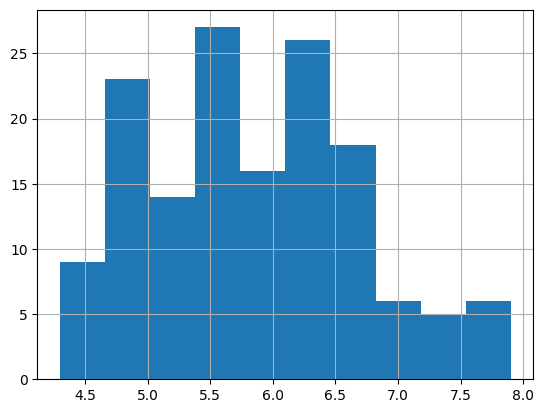

In [54]:
df['SepalLengthCm'].hist()

Sepal Width Distribution

<Axes: >

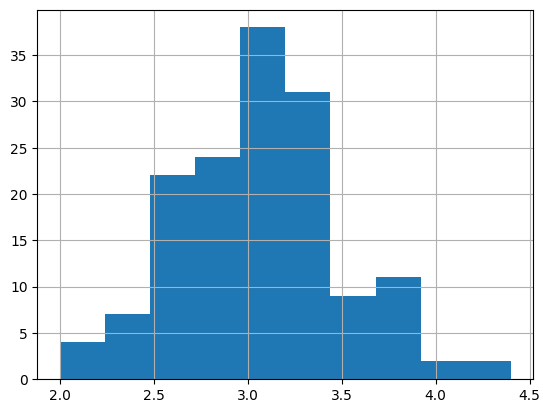

In [55]:
df['SepalWidthCm'].hist()

Petal Length Distribution

<Axes: >

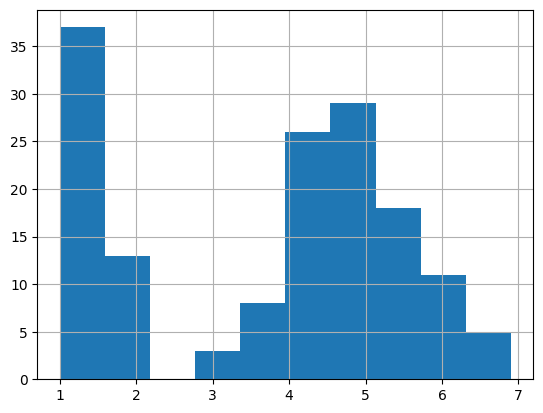

In [56]:
df['PetalLengthCm'].hist()

Petal Width Distribution

<Axes: >

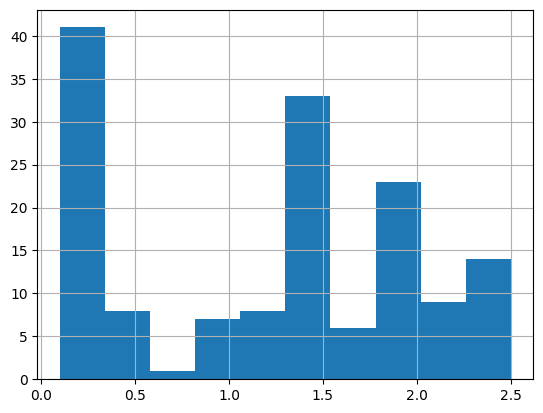

In [57]:
df['PetalWidthCm'].hist()

Define colors for each species

In [58]:
colors=['pink','gold','blue']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']

Scatter Plot Visualization for Sepal Length vs Sepal Width

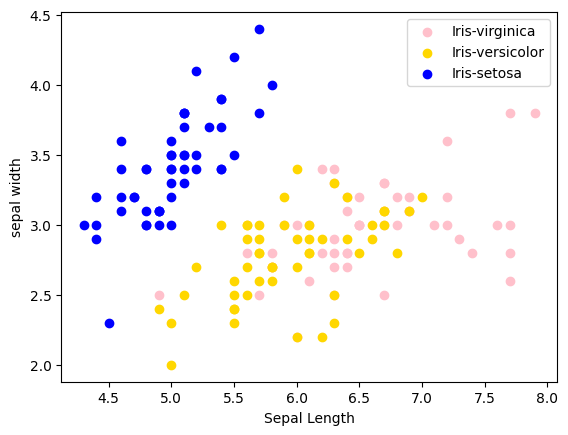

In [59]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c= colors[i],label=species[i])
    
plt.xlabel("Sepal Length")
plt.ylabel("sepal width")
plt.legend()

Scatter Plot Visualization for Petal Width vs Petal Length

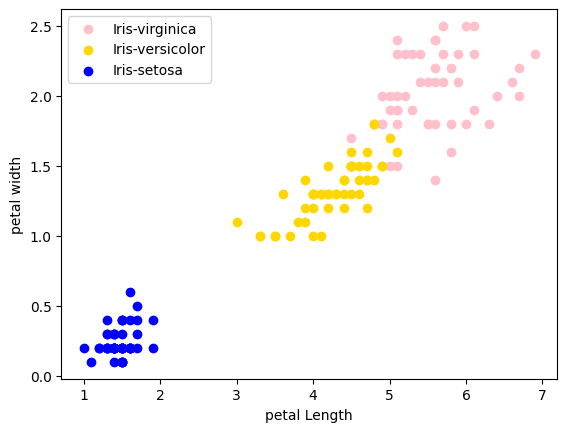

In [60]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c= colors[i],label=species[i])
    
plt.xlabel("petal Length")
plt.ylabel("petal width")
plt.legend()

Scatter Plot Visualization for Petal Length vs Sepal Length

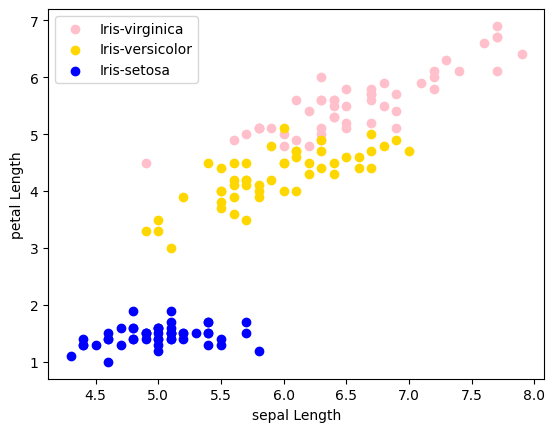

In [61]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c= colors[i],label=species[i])
    
plt.xlabel("sepal Length")
plt.ylabel("petal Length")
plt.legend()

Scatter Plot Visualization for Petal Width vs Sepal Width

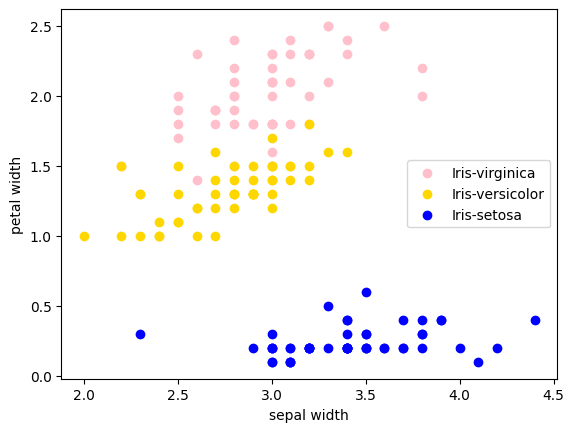

In [62]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c= colors[i],label=species[i])
    
plt.xlabel("sepal width")
plt.ylabel("petal width")
plt.legend()

Correlation Heatmap

In [63]:
corr=df.corr(numeric_only=True)

<Axes: >

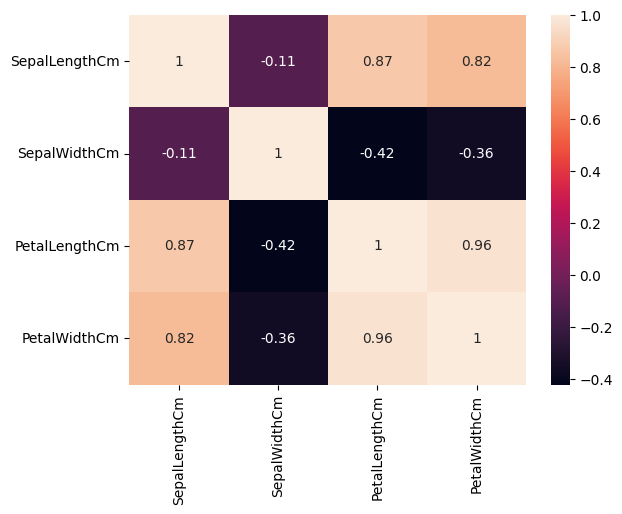

In [64]:
sns.heatmap(corr,annot=True)

Categorical Encoding

In [65]:
le=LabelEncoder()       # Create a LabelEncoder object
df['Species']=le.fit_transform(df['Species'])
unique_species = df['Species'].unique()     #Check unique values in 'Species' column

#Display the unique encoded values
print("Encoded Species Values:")
print(unique_species)
#Define: Iris-setosa =0, Iris-versicolor =1, Iris-virginica =2

Encoded Species Values:
[0 1 2]


Data Scaling

In [66]:
x=df.drop(columns=['Species'])
y=df['Species']

Data Splitting

In [67]:
#Splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [68]:
#Checking the train distribution of dependent variable
y_train.value_counts()

Species
1    37
0    36
2    32
Name: count, dtype: int64

Machine Learning Model Implementation

In [69]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train,y_train)      #Fit the model to the training data
    #make predictions on the test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    #calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)
    
    fig, ax = plt.subplots(1, 2, figsize=(11,4))
    
    print("\Confusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")
    
    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")
    
    plt.tight_layout()
    plt.show()
    
    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score

<>:13: SyntaxWarning: invalid escape sequence '\C'
<>:13: SyntaxWarning: invalid escape sequence '\C'
/var/folders/4h/8xkh77ks47j6v0f2m4rvg1tr0000gn/T/ipykernel_85362/1949169413.py:13: SyntaxWarning: invalid escape sequence '\C'
  print("\Confusion Matrix:")


In [70]:
# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])
     

Model 1: Logistic regression

In [71]:
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)

Explain the Machine Learning Model used and it's performance using Evaluation metric Score Chart

\Confusion Matrix:


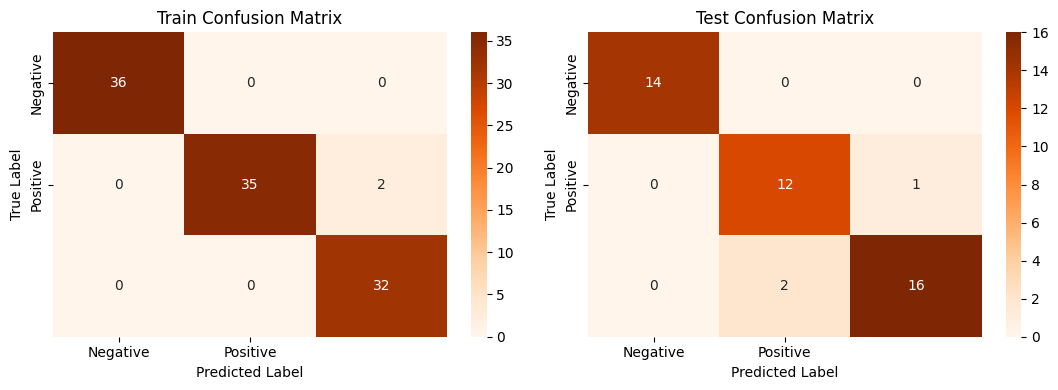


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  36        |
| 1            |    1        | 0.945946 |   0.972222 |  37        |
| 2            |    0.941176 | 1        |   0.969697 |  32        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.980392 | 0.981982 |   0.98064  | 105        |
| weighted avg |    0.982073 | 0.980952 |   0.980976 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 14        |
| 1            |    0.857143 | 0.923077 |   0.888889 | 13        |
| 2            |    0.941176 | 0.888889 |   0.914286 | 18        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.9333

In [72]:
# Visualizing evaluation Metric Score chart
lr_score = evaluate_model(lr_model, x_train, x_test, y_train, y_test)

In [73]:
# Updated Evaluation metric Score Chart
score['Logistic regression'] = lr_score
score

,Logistic regression
Precision Train,0.982073
Precision Test,0.935201
Recall Train,0.980952
Recall Test,0.933333
Accuracy Train,0.980952
Accuracy Test,0.933333
F1 macro Train,0.980976
F1 macro Test,0.933616


Random Forest

In [74]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    random_forest_model = model.fit(x_train,y_train)      #Fit the model to the training data
    #make predictions on the test data
    y_pred_train = random_forest_model.predict(x_train)
    y_pred_test = random_forest_model.predict(x_test)
    #calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)
    
    fig, ax = plt.subplots(1, 2, figsize=(11,4))
    
    print("Confusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")
    
    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")
    
    plt.tight_layout()
    plt.show()
    
    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score

In [75]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [76]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [77]:
y_pred_rf = rf_model.predict(x_test)

Confusion Matrix:


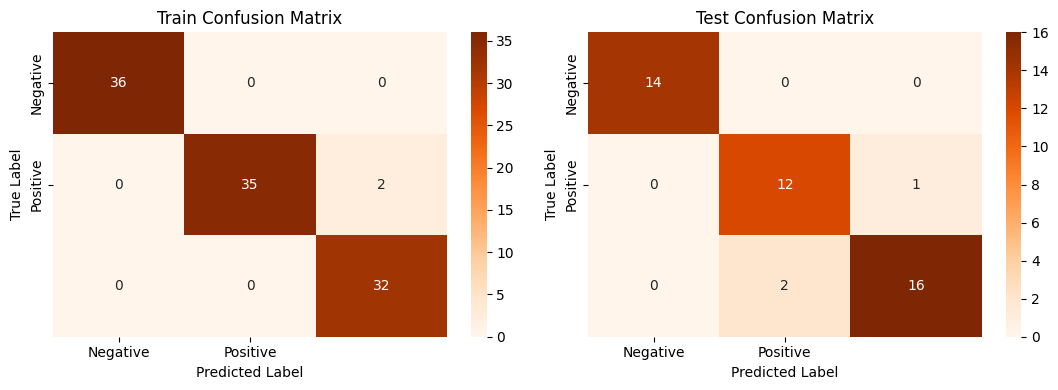


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  36        |
| 1            |    1        | 0.945946 |   0.972222 |  37        |
| 2            |    0.941176 | 1        |   0.969697 |  32        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.980392 | 0.981982 |   0.98064  | 105        |
| weighted avg |    0.982073 | 0.980952 |   0.980976 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 14        |
| 1            |    0.857143 | 0.923077 |   0.888889 | 13        |
| 2            |    0.941176 | 0.888889 |   0.914286 | 18        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.9333

In [78]:
rf_score= evaluate_model(lr_model, x_train, x_test, y_train, y_test)

In [79]:
score['Random Forest'] = rf_score
score

,Logistic regression,Random Forest
Precision Train,0.982073,0.982073
Precision Test,0.935201,0.935201
Recall Train,0.980952,0.980952
Recall Test,0.933333,0.933333
Accuracy Train,0.980952,0.980952
Accuracy Test,0.933333,0.933333
F1 macro Train,0.980976,0.980976
F1 macro Test,0.933616,0.933616
